# Statistical Analysis and Hypothesis Testing on Business Sales Dataset

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Increasing the column width for better viewing

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

Loading the dataset

Making sure that the encoding for the csv file is correct

In [3]:
df = pd.read_csv("Superstore.csv", encoding="cp1252")

Exploring the dataset

In [5]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID    Customer Name    Segment        Country             City       State  Postal Code Region       Product ID         Category Sub-Category                                       Product Name     Sales  Quantity  Discount    Profit
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky        42420  South  FUR-BO-10001798        Furniture    Bookcases                  Bush Somerset Collection Bookcase  261.9600         2      0.00   41.9136
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520      Claire Gute   Consumer  United States        Henderson    Kentucky        42420  South  FUR-CH-10000454        Furniture       Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3      0.00  219.5820
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-1304

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Statistical Summary for numerical columns

In [9]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount       Profit
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203    28.656896
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   234.260108
min       1.000000   1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000     1.728750
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000     8.666500
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000    29.364000
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000  8399.976000


Statistical Summary for Categorical Columns

In [11]:
print(df.describe(include="object"))

              Order ID Order Date   Ship Date       Ship Mode Customer ID  Customer Name   Segment        Country           City       State Region       Product ID         Category Sub-Category     Product Name
count             9994       9994        9994            9994        9994           9994      9994           9994           9994        9994   9994             9994             9994         9994             9994
unique            5009       1237        1334               4         793            793         3              1            531          49      4             1862                3           17             1850
top     CA-2017-100111   9/5/2016  12/16/2015  Standard Class    WB-21850  William Brown  Consumer  United States  New York City  California   West  OFF-PA-10001970  Office Supplies      Binders  Staple envelope
freq                14         38          35            5968          37             37      5191           9994            915        2001   3203     

Descriptive Statistics

In [12]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numerical_cols)

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [15]:
df[numerical_cols].agg(["mean", "median", "std", "min", "max", "skew", "kurt"])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
median,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000
skew,0.000000,-0.128526,12.972752,1.278545,1.684295,7.561432
kurt,-1.200000,-1.493020,305.311753,1.991889,2.409546,397.188515


### Visualizations

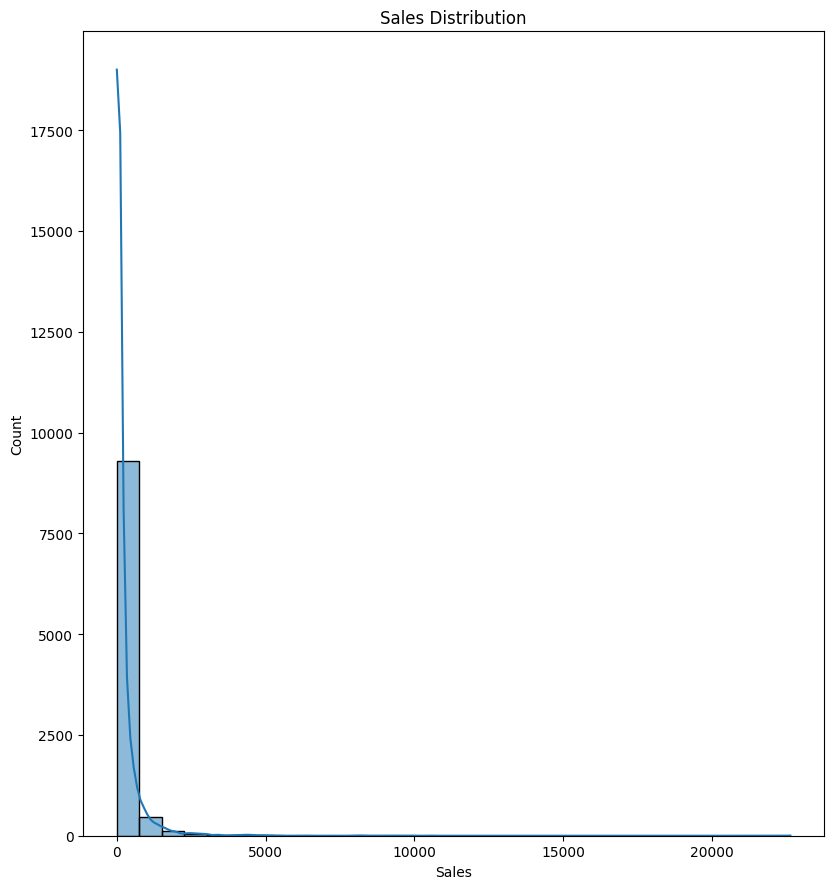

In [20]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.tight_layout()
plt.show()

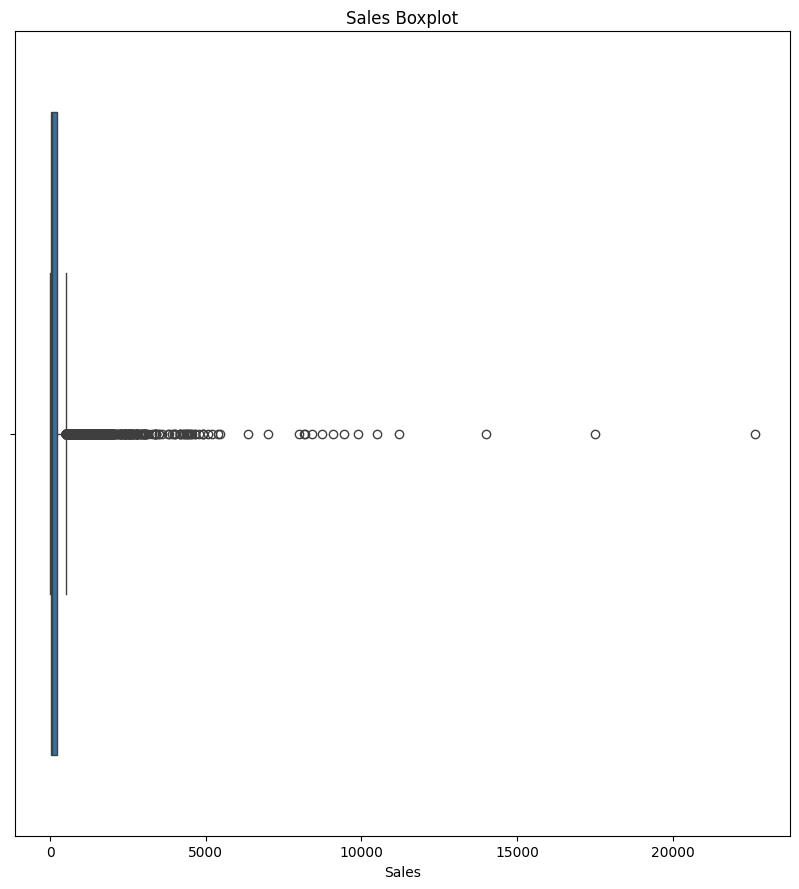

In [21]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Sales"])
plt.title("Sales Boxplot")
plt.tight_layout()
plt.show()

### Hypothesis Testing

Hypothesis 1:

Ho: The average sales for the "Technology" category is equal to $250

H1: The average sales for the "Technology" category is **not equal** to $250

Conclusion:

Since the p_value is less than 0.05 the hypothesis H0 is rejected and H1 is accepted.

The average sales for "Technology" category is different than $250.


In [27]:
tech_sales = df[df["Category"] == "Technology"]["Sales"]
print(tech_sales)

7        907.152
11       911.424
19       213.480
26        90.570
35      1097.544
          ...   
9983      97.980
9986      36.240
9987      79.990
9988     206.100
9991     258.576
Name: Sales, Length: 1847, dtype: float64


In [33]:
category_t_stat, category_p_value = stats.ttest_1samp(tech_sales, popmean=250)

print(f"T-statistic: {category_t_stat:.4f}")

print(f"\np-value: {category_p_value:.4f}")

T-statistic: 7.8580

p-value: 0.0000


### Hypothesis 2:

H0: Average profit of "East" and "West" regions is same.

H1: Average profit of "East" and "West" regions **is different**.

Conclusion:

Since the p-value is more than 0.05 hypothesis H0 is accepted and H1 is rejected.

The average profit for "East" and "West" regions is about the same.

In [31]:
east_profit = df[df["Region"] == "East"]["Profit"]
print(f"East Profit:\n{east_profit}")

west_profit = df[df["Region"] == "West"]["Profit"]
print(f"\nWest Profit:\n{west_profit}")


East Profit:
23        -1.0196
27     -1665.0522
28        -7.0532
29        15.5250
30         1.1016
          ...    
9968     331.1910
9969       6.5975
9981       5.3690
9984      15.1200
9985      16.1240
Name: Profit, Length: 2848, dtype: float64

West Profit:
2        6.8714
5       14.1694
6        1.9656
7       90.7152
8        5.7825
         ...   
9986    15.2208
9990    15.6332
9991    19.3932
9992    13.3200
9993    72.9480
Name: Profit, Length: 3203, dtype: float64


In [34]:
region_t_stat, region_p_value = stats.ttest_ind(east_profit, west_profit, equal_var=False)

print(f"T-statistic: {region_t_stat:.4f}")

print(f"\np-value: {region_p_value:.4f}")

T-statistic: -0.3043

p-value: 0.7609


### Chi-Square Test for Category vs Region

Hypothesis:

H0: Category and Region are dependent on each other

H1: Category and region are **not dependent** on each other

Since the p-value is more than 0.05 hypothesis H0 is accepted and H1 is rejected.

There is no dependency between category and region.

In [35]:
contingency_table = pd.crosstab(df["Category"], df["Region"])
print(f"Contingency Table:\n{contingency_table}")

Contingency Table:
Region           Central  East  South  West
Category                                   
Furniture            481   601    332   707
Office Supplies     1422  1712    995  1897
Technology           420   535    293   599


In [36]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistics:")

print(f"\nChi-Square value: {chi2:.4f}")

print(f"\np-value: {p:.4f}")


Chi-Square Statistics:

Chi-Square value: 3.6619

p-value: 0.7223


### Correlation Heatmap of numerical columns

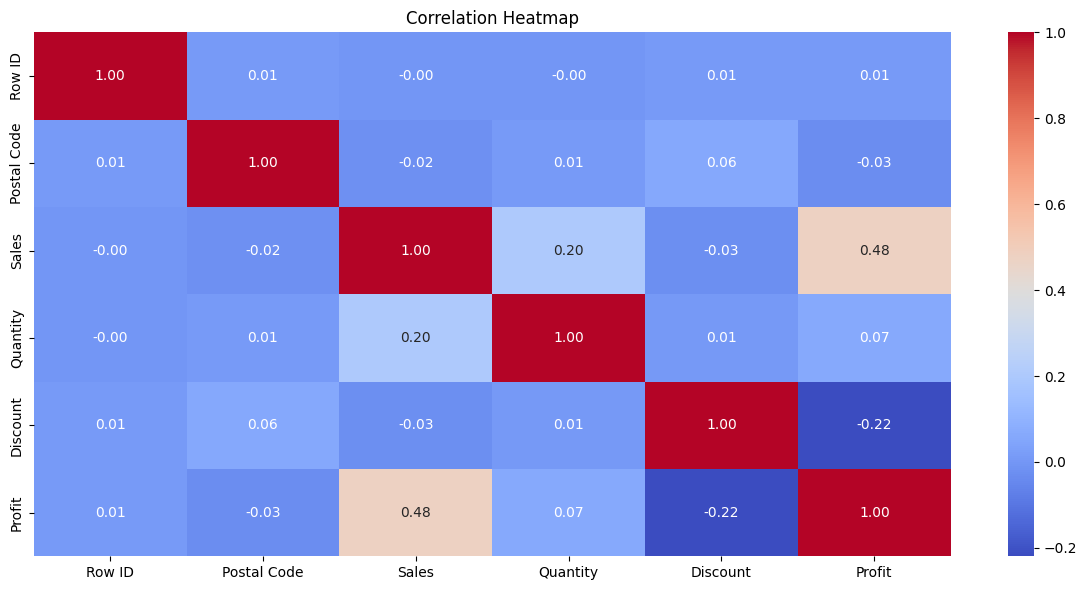

In [44]:
corr = df[numerical_cols].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Pivot Table / Group-wise Summary

Finding average sales and profit per region and category

In [ ]:
pivot_table = df.pivot_table(values=["Sales", "Profit"],
                             index="Region",
                             columns="Category",
                             aggfunc="mean")

pivot_table

Profit                                  Sales                            
Category  Furniture Office Supplies Technology   Furniture Office Supplies  Technology
Region                                                                                
Central   -5.968918        6.244712  80.231981  340.534644      117.458801  405.753124
East       5.068496       23.957114  88.714084  346.574383      120.044425  495.278469
South     20.395199       20.086827  68.231506  353.309289      126.282727  507.753952
West      16.272914       27.733183  73.962687  357.302325      116.422377  420.687533

### ANOVA for Profit across Categories

Hypothesis:

H0: Mean profit is same across all categories

H1: Mean profit is different in atleast one category.

Conclusion:

Since the p-value is less than 0.05 the hypothesis H0 is rejected and H1 is accepted.

Profit is different accross categories.

In [49]:
tech_profit = df[df["Category"] == "Technology"]["Profit"]
print(f"Tech Profit: \n{tech_profit}")

Tech Profit: 
7        90.7152
11       68.3568
19       16.0110
26       11.7741
35      123.4737
          ...   
9983     27.4344
9986     15.2208
9987     28.7964
9988     55.6470
9991     19.3932
Name: Profit, Length: 1847, dtype: float64


In [53]:
furniture_profit = df[df["Category"] == "Furniture"]["Profit"]
print(f"\nFurniture Profit: \n{furniture_profit}")


Furniture Profit: 
0        41.9136
1       219.5820
3      -383.0310
5        14.1694
10       85.3092
          ...   
9962    -67.6704
9964      6.4320
9980     22.3548
9989      4.1028
9990     15.6332
Name: Profit, Length: 2121, dtype: float64


In [ ]:
office_supply_profit = df[df["Category"] == "Office Supplies"]["Profit"]
print(f"\nOffice Supply Profit: \n{office_supply_profit}")


Office Supply Profit: 
2        6.8714
4        2.5164
6        1.9656
8        5.7825
9       34.4700
         ...   
9982    16.7132
9984    15.1200
9985    16.1240
9992    13.3200
9993    72.9480
Name: Profit, Length: 6026, dtype: float64


In [57]:
anova_f_stat, anova_p_value = stats.f_oneway(tech_profit, furniture_profit, office_supply_profit)

print(f"F-statistics:")

print(f"\nF-stat: {anova_f_stat:.4f}")

print(f"\np-value: {anova_p_value:.4f}")

F-statistics:

F-stat: 54.3110

p-value: 0.0000
